In [67]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from math import nan

from CASutils import mapplot_utils as mymaps
from CASutils import plotposition_utils as plotpos
from CASutils import shapefile_utils as shp
from CASutils import averaging_utils as avg

importlib.reload(mymaps)
importlib.reload(plotpos)
importlib.reload(shp)

<module 'CASutils.shapefile_utils' from '/home/islas/python/CASanalysis/CASutils/shapefile_utils.py'>

In [62]:
gpcp = xr.open_dataset("/project/cas/islas/Downloads/precip.mon.mean.nc")
gpcp = gpcp.sel(time=slice("1979-01","2020-12"))

In [66]:
# sort out shapefiles
shpfile="/project/cas/islas/shapefiles/usa/gadm36_USA_0.shp"
maskusa = shp.maskgen(shpfile, gpcp.precip, ['United States'])

shpfile="/project/cas/islas/shapefiles/usa/gadm36_USA_1.shp"
maskcal = shp.maskgen(shpfile, gpcp.precip, ['California'])
masknev = shp.maskgen(shpfile, gpcp.precip, ['Nevada'])
maskutah = shp.maskgen(shpfile, gpcp.precip, ['Utah'])
maskariz = shp.maskgen(shpfile, gpcp.precip, ['Arizona'])
masknm = shp.maskgen(shpfile, gpcp.precip, ['New Mexico'])
maskcol = shp.maskgen(shpfile, gpcp.precip, ['Colorado'])

shpfile="/project/cas/islas/shapefiles/canada/gadm36_CAN_0.shp"
maskcan = shp.maskgen(shpfile, gpcp.precip, ['Canada'])
shpfile="/project/cas/islas/shapefiles/mexico/gadm36_MEX_0.shp"
maskmex = shp.maskgen(shpfile, gpcp.precip, ['Mexico'])

masking United States
masking California
masking Nevada
masking Utah
masking Arizona
masking New Mexico
masking Colorado
masking Canada
masking Mexico


In [45]:
maskcontinent = np.empty([maskusa.lat.size, maskuse.lon.size])
maskcontinent[ (maskusa == 1) | (maskcan == 1) | (maskmex == 1)] = 1

Make state averages

In [87]:
prmaskd = xr.DataArray(gpcp.precip*maskcal, coords=gpcp.coords)
prcal = avg.cosweightlonlat(prmaskd, 0, 360, -90, 90)
nyears = prcal.time.size/12 
prcal = np.reshape(np.array(prcal),[np.int(nyears),12])

prmaskd = xr.DataArray(gpcp.precip*masknev, coords=gpcp.coords)
prnev = avg.cosweightlonlat(prmaskd, 0, 360, -90, 90)
prnev = np.reshape(np.array(prnev),[np.int(nyears),12])

prmaskd = xr.DataArray(gpcp.precip*maskutah, coords=gpcp.coords)
prutah = avg.cosweightlonlat(prmaskd, 0, 360, -90, 90)
prutah = np.reshape(np.array(prutah),[np.int(nyears),12])

prmaskd = xr.DataArray(gpcp.precip*maskariz, coords=gpcp.coords)
prariz = avg.cosweightlonlat(prmaskd, 0, 360, -90, 90)
prariz = np.reshape(np.array(prariz),[np.int(nyears),12])

prmaskd = xr.DataArray(gpcp.precip*masknm, coords=gpcp.coords)
prnm = avg.cosweightlonlat(prmaskd, 0, 360, -90, 90)
prnm = np.reshape(np.array(prnm),[np.int(nyears),12])

prmaskd = xr.DataArray(gpcp.precip*maskcol, coords=gpcp.coords)
prcol = avg.cosweightlonlat(prmaskd, 0, 360, -90, 90)
prcol = np.reshape(np.array(prcol),[np.int(nyears),12])

In [94]:
prcalm = np.mean(prcal,axis=0)
prnevm = np.mean(prnev, axis=0)
prutahm = np.mean(prutah, axis=0)
prarizm = np.mean(prariz, axis=0)
prnmm = np.mean(prnm, axis=0)
prcolm = np.mean(prcol, axis=0)

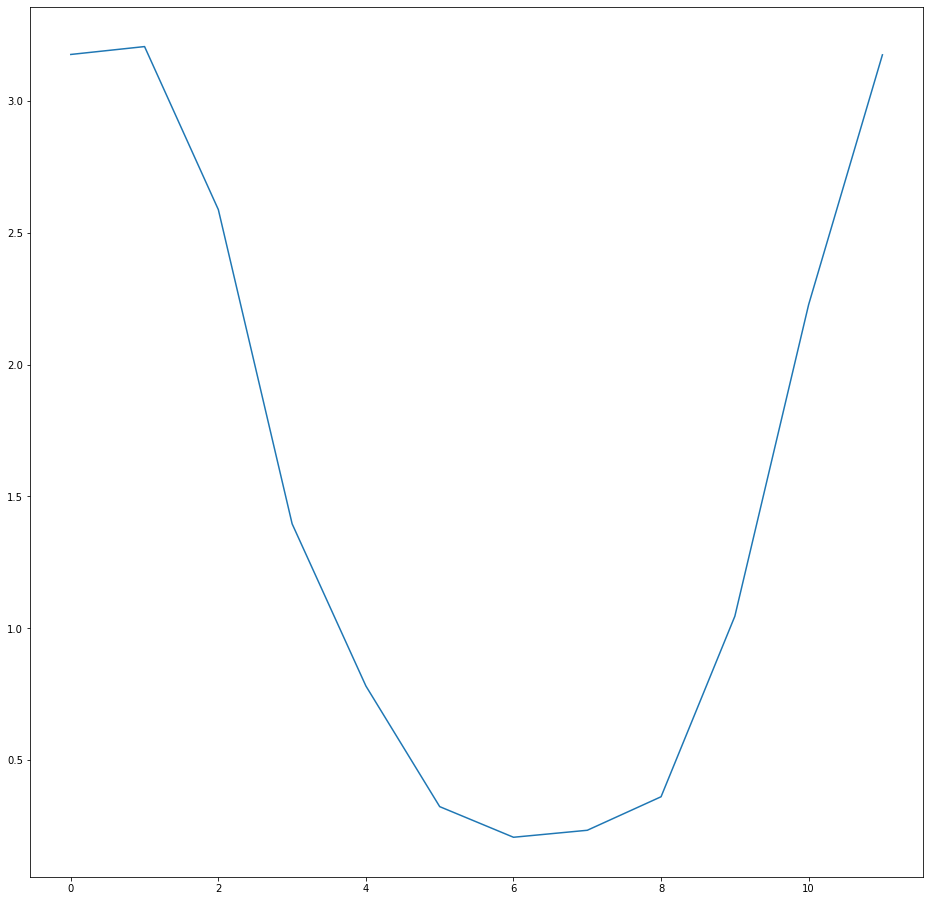

In [96]:
fig = plt.figure(figsize=(16,16))

ax = plt.plot(np.arange(0,12,1), prcalm)

In [93]:
print(prcalm)

[3.17541113 3.20529489 2.58718181 1.39619798 0.78141085 0.32429662
 0.20818385 0.23468553 0.36175443 1.04601535 2.22715576 3.17401827]


In [55]:
precipclim = gpcp.precip.groupby('time.month').mean('time')
precip2020 = gpcp.precip.sel(time=slice("2020-01-01","2020-12-01"))

In [15]:
x1, x2, y1, y2 = plotpos.get4by4coords()

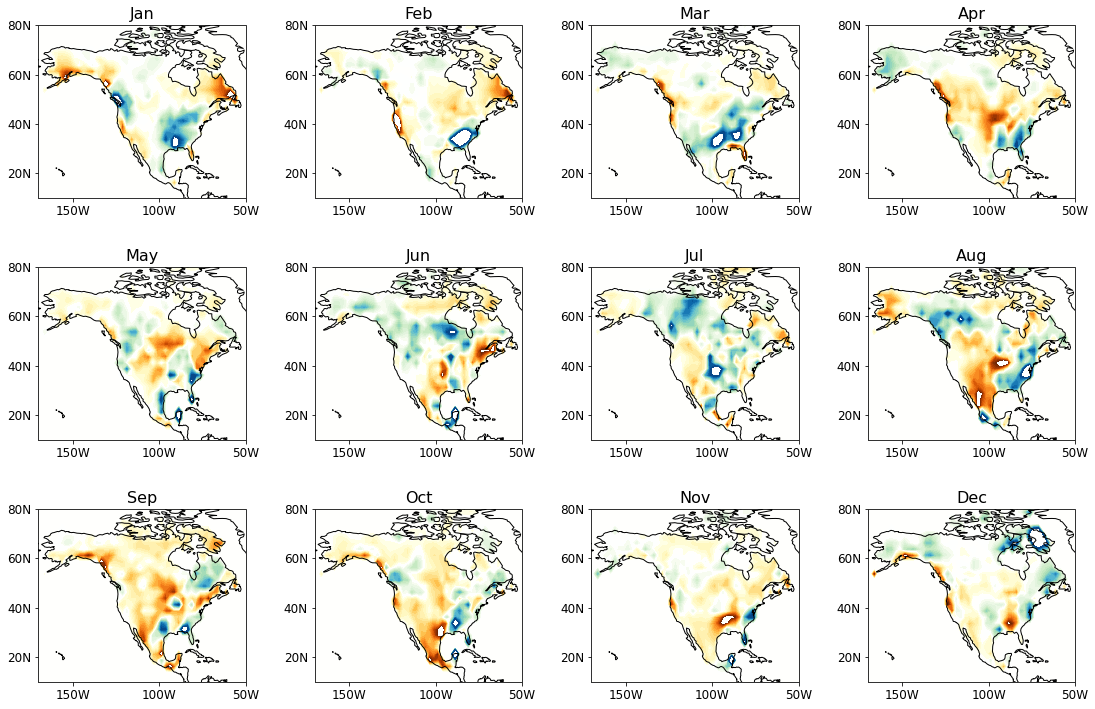

In [61]:
title=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(16,16))
for imon in np.arange(0,12,1):
    ax = mymaps.contourmap_northamerica_fill_pos(fig, maskcontinent*(precip2020.isel(time=imon) - precipclim.isel(month=imon)), precipclim.lon, precipclim.lat,0.1,-2,2,title[imon],
                                                  x1[imon],x2[imon],y1[imon],y2[imon],cmap='precip')

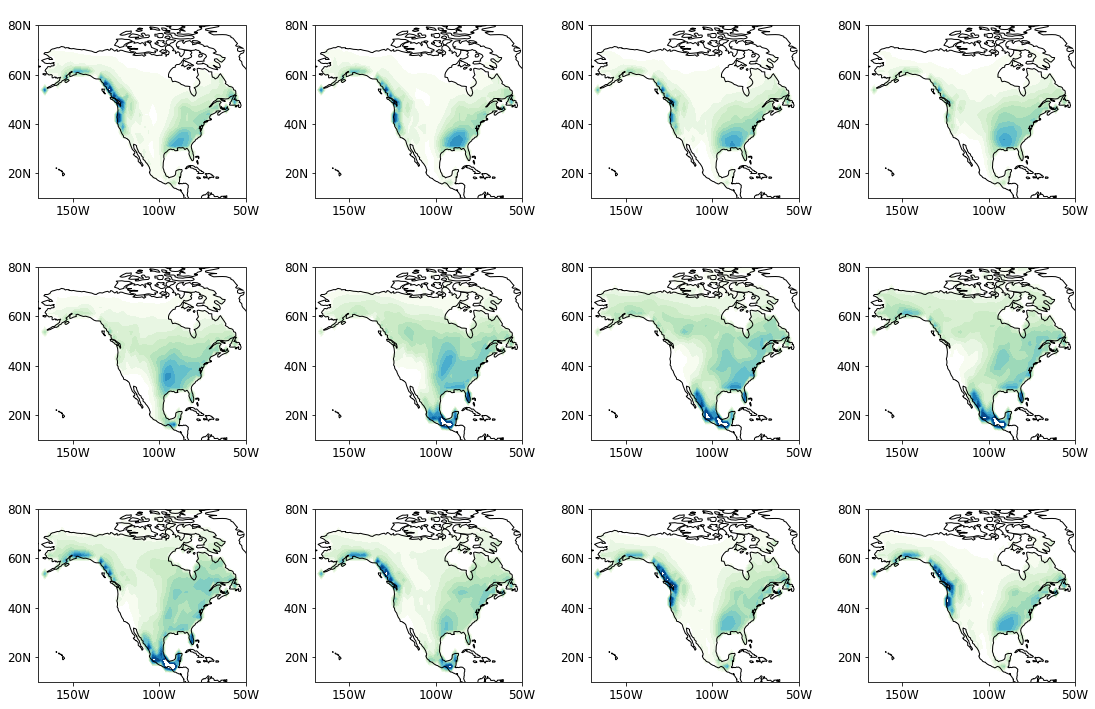

In [51]:
fig = plt.figure(figsize=(16,16))
for imon in np.arange(0,12,1):
    ax = mymaps.contourmap_northamerica_fill_pos(fig, maskcontinent*precipclim.isel(month=imon), precipclim.lon, precipclim.lat,0.5,-7,7,' ',
                                                  x1[imon],x2[imon],y1[imon],y2[imon],cmap='precip')
    